# Analisis Persepsi Netizen Terkait #TolakOmnibusLaw dan Negara tujuan Favorit Imigran Indonesia terkait Viralnya Fenomena #PindahWargaNegara

Pengantar:
Kehebohan akibat pengesahan draft Omnibus Law terkait Cipta Lapangan Kerja menimbulkan berbagai reaksi di sosial media. Salah satu fenomena yang menarik adalah sempat munculnya tweet dengan hastag #PindahWargaNegara yang kini sudah mereda. Disini penulis ingin menganalisa 2 hal terkait dengan fenomena tersebut:


1.   Bagaimana persepsi netizen saat ini terkait omnibus law? apakah masih banyak yang berkomentar negatif di media sosial?
2.   Jika benar2 ingin pindah warga negara, negara mana yang bisa menjadi rekomendasi untuk WNI berdasarkan jumlah imigran yang berada di luar negeri?



## Data 1: Data Twitter yang mengandung kata TolakOmnibusLaw

In [9]:
import tweepy
import json
import numpy as np
import pandas as pd
import re
from pandas.io.json import json_normalize
consumer_key = "Yu7jCGA78ABY6eHrWMKYojKX5"
consumer_secret = "FfxOHv2cAQPhfKlaUEj7mg87NhGSI10J9cjzHGvff7biHp8v2B"
access_token = "71495930-tFiTSaCkM24X2QoGe0gw0L3l9m3pjzdBHVmI7FjOu"
access_token_secret = "yxCYXI04uteHpDiuWICpLfejkg6udCtXz4LfJbm4bnAPW"

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
search_words = "tolakomnibuslaw"
date_since = "2020-10-20"
new_search = search_words + " -filter:retweets"

tweets = tweepy.Cursor(api.search,
        q=new_search,
        lang="id",
        since=date_since).items(500)

In [4]:
items = []
for tweet in tweets:
      items.append (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet.text).split()))
hasil = pd.DataFrame(data=items, columns=['tweet'])
data1 = hasil
data1.head()

tweet
0  Sejumlah massa aksi diamankan oleh kepolisian ...
1  jangan sampai keluar dari trending topik Lawan...
2  Undang undang purba sistem sentralistik dihidu...
3  Dah cukup testnya baru di tetesin kekuasaan sa...
4             Bener2 penuh tipu daya TolakOmnibusLaw

## Data 2: Data Wikipedia terkait jumlah TKI yang tersebar di seluruh dunia periode 2011-2014

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

URL = 'https://en.wikipedia.org/wiki/Indonesian_migrant_worker'
response = requests.get(URL)
soup = BeautifulSoup(response.text,'html.parser')

table = soup.find('table',{'class':'wikitable sortable'}).tbody
rows = table.find_all('tr')
columns = [v.text.replace('\n','') for v in rows[0].find_all('th')]

df = pd.DataFrame(columns=columns)

for i in range(2,len(rows)):
    tds = rows[i].find_all('td')
    values = [td.text.replace('\n',''.replace('\xa0','')) for td in tds]

    df = df.append(pd.Series(values, index=columns), ignore_index=True)
    #print(df)

data2 = df.apply(lambda x: x.str.replace(',', ''), axis=1)
##data2.iloc[:1:5] = data2.iloc[:,1:5].astype(float)
data2.head()


Country    2011   2012   2013  2014*
0                 Taiwan   78865  81071  83544  68874
1           Saudi Arabia  137835  40655  45394  38104
2              Hong Kong   50301  45478  41769  30208
3              Singapore   47786  41556  34655  25601
4   United Arab Emirates   39917  35571  44505  15276

## Create Sentimen Model based on dataset_tweet_2.csv

In [ ]:
!wget https://raw.githubusercontent.com/iqbalhanif/Sanberlearn/master/dataset_tweet_2.csv

In [ ]:
!pip install nltk
!python -m nltk.downloader popular
!pip install sastrawi

In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import csv

file = 'dataset_tweet_2.csv'

token_data = open(file)
tokens = csv.reader(token_data, delimiter=';')
tweets = []
label = []
for row in tokens:
    tweets.append(row[0])
    label.append(int(row[1].replace(',','')))

df = pd.DataFrame(columns=['tweets','label'])
df['tweets'] = tweets
df['label'] = label

print (df)

In [ ]:
import re,string

clean_tweets = []
for tweet in tweets:
    def hapus_tanda(tweet): 
        tanda_baca = set(string.punctuation)
        tweet = ''.join(ch for ch in tweet if ch not in tanda_baca)
        return tweet
    
    def hapus_katadouble(s): 
        pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
        return pattern.sub(r"\1\1", s)

    tweet=tweet.lower()
    tweet = re.sub(r'\\u\w\w\w\w', '', tweet)
    tweet=re.sub(r'http\S+','',tweet)
    #hapus @username
    tweet=re.sub('@[^\s]+','',tweet)
    #hapus #tagger 
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #hapus tanda baca
    tweet=hapus_tanda(tweet)
    #hapus angka dan angka yang berada dalam string 
    tweet=re.sub(r'\w*\d\w*', '',tweet).strip()
    #hapus repetisi karakter 
    tweet=hapus_katadouble(tweet)
    #stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    tweet = stemmer.stem(tweet)
    clean_tweets.append(tweet)

df['clean'] = clean_tweets
print(df.head())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB

vectorizer = TfidfVectorizer (max_features=2500)
model_g = GaussianNB()

v_data = vectorizer.fit_transform(df['clean']).toarray()

print (v_data)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(v_data, df['label'], test_size=0.2, random_state=0)
model_g.fit(X_train,y_train)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_preds = model_g.predict(X_test)

print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))
print('nilai akurasinya adalah ',accuracy_score(y_test, y_preds))

[[8 4]
 [1 4]]
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.50      0.80      0.62         5

    accuracy                           0.71        17
   macro avg       0.69      0.73      0.69        17
weighted avg       0.77      0.71      0.72        17

nilai akurasinya adalah  0.7058823529411765


**Analisa dan kesimpulan:**
Model sentimen yang dibangun menghasilkan akurasi sekitar 70%, tidak terlalu buruk namun masih perlu di tingkatkan lagi kedepannya dengan menambah jumlah data latih yang sudah diberi label/anotasi

## Predict Sentimen of Collected Tweet

In [ ]:
tweets = data1['tweet']


clean_tweets = []
for tweet in tweets:
    def hapus_tanda(tweet): 
        tanda_baca = set(string.punctuation)
        tweet = ''.join(ch for ch in tweet if ch not in tanda_baca)
        return tweet
    
    def hapus_katadouble(s): 
        pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
        return pattern.sub(r"\1\1", s)

    tweet=tweet.lower()
    tweet = re.sub(r'\\u\w\w\w\w', '', tweet)
    tweet=re.sub(r'http\S+','',tweet)
    #hapus @username
    tweet=re.sub('@[^\s]+','',tweet)
    #hapus #tagger 
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #hapus tanda baca
    tweet=hapus_tanda(tweet)
    #hapus angka dan angka yang berada dalam string 
    tweet=re.sub(r'\w*\d\w*', '',tweet).strip()
    #hapus repetisi karakter 
    tweet=hapus_katadouble(tweet)
    #stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    tweet = stemmer.stem(tweet)
    clean_tweets.append(tweet)

data1['clean'] = clean_tweets
print(data1.head())

In [ ]:
vectorizer = TfidfVectorizer (max_features=449)

y_data = vectorizer.fit_transform(data1['clean']).toarray()
print(y_data)

In [ ]:
y_data.shape
##X_test.shape

In [ ]:
data1['label'] = model_g.predict(y_data)
data1.head()

Nilai rata-rata: 0.484
Nilai median: 0.0
Standar deviasi: 0.49974393443042414


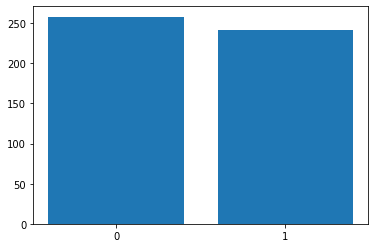

In [56]:
print ("Nilai rata-rata: "+str(np.mean(data1["label"])))
print ("Nilai median: "+str(np.median(data1["label"])))
print ("Standar deviasi: "+str(np.std(data1["label"])))

import matplotlib.pyplot as plt

labels, counts = np.unique(data1["label"], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

**Analisa dan kesimpulan:**
Rata-rata sentimen menunjukkan nilai <0.5 dan median 0, membuktikan bahwa **tweet dengan sentimen negatif lebih banyak** dibanding yang positif. Standar deviasi yang cukup kecil, diperkuat dengan bukti berupa barchart dengan tinggi yang tidak jauh beda, menunjukkan bahwa jumlah tweet yang negatif dan positif tidak jauh berbeda jumlahnya. Kesimpulannya: mayoritas netizen masih memandang negatif omnibus law, namun tidak sedikit juga yang mengeluarkan tweet dengan sentimen positif sehingga mampu mengimbangi tweet negatif.**Namun validitas kesimpulan ini sangat tergantung kemampuan model sentimen yang sebelumnya kita buat.**

# KMeans for Tabular Data

In [ ]:
data3 = data2
data3["2011"] = pd.to_numeric(data2["2011"])
data3["2012"] = pd.to_numeric(data2["2012"])
data3["2013"] = pd.to_numeric(data2["2013"])
data3["2014*"] = pd.to_numeric(data2["2014*"])
nan_value = float("NaN")
data3.replace(nan_value, 0, inplace=True)

num_data = data3.iloc[:, 1:5]

# mengubahnya menjadi array
num_array = np.array(num_data)
print(num_array)

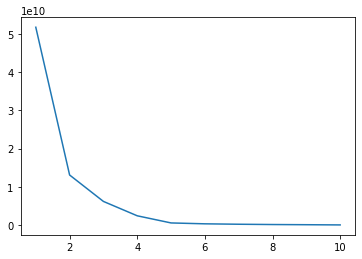

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k).fit(num_data)
    centroids = kmeans.cluster_centers_
    prediksi = kmeans.predict(num_data)
    nilai_sse = 0
    
    for i in range(len(num_data)):
        titik_pusat = centroids[prediksi[i]]
        nilai_sse += ((num_data.iloc[i, 0] - titik_pusat[0]) ** 2 + (num_data.iloc[i, 1] - titik_pusat[1]) ** 2 + (num_data.iloc[i, 2] - titik_pusat[2]) ** 2 +  (num_data.iloc[i, 3] - titik_pusat[3]) ** 2)
    
    sse.append(nilai_sse)
    k_list.append(k)

plt.plot(k_list,sse)
plt.show()

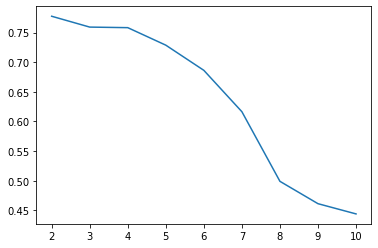

In [20]:
from sklearn.metrics import silhouette_score

daftar = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k).fit(num_data)
    labels = kmeans.labels_
    daftar.append(silhouette_score(num_data, labels, metric = 'euclidean'))
    k_list.append(k)

plt.plot(k_list,daftar)
plt.show()

**Analisa dan kesimpulan:**
Nilai K terbaik untuk data tesebut ada k=2, tebukti dengan grafik elbow yang berbelok cukup tajam di angka tersebut dan silhuetta dengan nilai tertinggi.

## Interpretasi Hasil KMeans

In [14]:
km = KMeans(
    n_clusters=2,
    random_state=200
)
kmeans = km.fit(num_data)
data3['kluster'] = kmeans.labels_
data3.head(100)

Country      2011     2012     2013  2014*  kluster
0                  Taiwan   78865.0  81071.0  83544.0  68874        1
1            Saudi Arabia  137835.0  40655.0  45394.0  38104        1
2               Hong Kong   50301.0  45478.0  41769.0  30208        1
3               Singapore   47786.0  41556.0  34655.0  25601        1
4    United Arab Emirates   39917.0  35571.0  44505.0  15276        1
5                    Oman    7306.0   8836.0  10719.0  15035        0
6             South Korea   11392.0  13593.0  15374.0   9623        0
7                  Brunei   10804.0  13146.0  11269.0   9298        0
8           United States   13749.0  15353.0  15021.0   7839        0
9                   Qatar   16616.0  20380.0  16237.0   6872        0
10                Bahrain    4379.0   6328.0   5384.0   4535        0
11                  Japan    2508.0   3293.0   3042.0   2093        0
12                 Kuwait    2723.0   2518.0   2534.0   1530        0
13                 Turkey    1016.0   1209.0   1518.0   1155        0
14                  Italy    3408.0   3691.0   3746.0   1075        0
15                  China    1072.0   1967.0   2055.0    812        0
16                   Fiji     556.0    970.0    848.0    809        0
17                 Canada       0.0      0.0      0.0    805        0
18                  Spain    1484.0   1746.0   1417.0    754        0
19              Mauritius     478.0    982.0   1017.0    734        0
20            Netherlands     592.0    798.0   1176.0    664        0
21               Thailand    1113.0   1035.0   1041.0    597        0
22                Germany     299.0    697.0   1168.0    518        0
23              Australia     526.0    945.0   1012.0    441        0
24           South Africa    1272.0   1388.0    905.0    460        0
25    Trinidad and Tobago       0.0      0.0      0.0    481        0

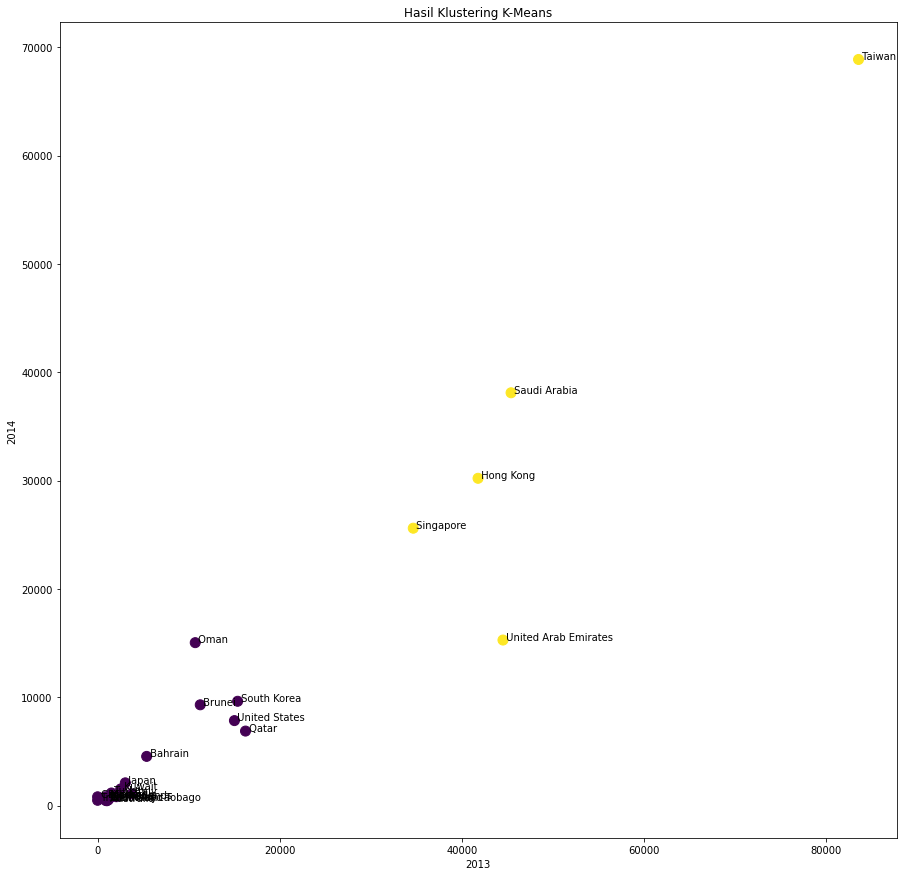

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
plt.scatter(data3["2013"], data3["2014*"], s = 100, c = data3.kluster, marker = "o", alpha = 5, cmap='viridis')
plt.title("Hasil Klustering K-Means")
plt.xlabel("2013")
plt.ylabel("2014")
n = np.array(data3["Country"])
x = np.array(data3["2013"])
y = np.array(data3["2014*"])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

plt.show()

**Analisa dan kesimpulan:**
Menilik fenomena #PindahWargaNegara akibat pemerintah mengesahkan omnibus law, berikut ada **5 rekomendasi negara yang konsisten memiliki jumlah WNI/TKI yang cukup tinggi, dengan label kluster = 1**:

1.  Taiwan
2.  Arab Saudi
3.  Hongkong
4.  Singapura
5.  Uni Emirat Arab

Sedangkan negara lainnya (Dengan label kluster = 0) memiliki jumlah WNI/TKI yang cukup sedikit bila dibandingkan dengan negara2 di kluster = 1. Hal ini juga diperkuat dengan grafik diatas, meskupun hanya melakukan plot dengan data pada tahun 2013 dan 2014.

